# Competition Description (as on kaggle)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data Description 

The data has been split into two groups:

training set (train.csv)
test set (test.csv)


The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.



The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.



We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.

## Metric

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def prep_data(data):
    '''
    En-codes the Sex and Embarked with integers
    
    Argument :
        data : the dataFrame that needs to en-coded
    '''
    #data['Age'] = data.Age.fillna(data.Age.dropna().median())
    #data['Fare'] = data.Fare.fillna(data.Fare.dropna().median())
    
    data.loc[data.Sex == 'female', 'Sex'] = 0
    data.loc[data.Sex == 'male', 'Sex'] = 1
    
    data.Embarked = data.Embarked.fillna('S')
    data.loc[data.Embarked == 'S','Embarked'] = 0
    data.loc[data.Embarked == 'Q','Embarked'] = 1
    data.loc[data.Embarked == 'C','Embarked'] = 2

In [3]:
train_data = pd.read_csv('titanic/train.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Cabin has a lot of missing values 
- Age has few missing values but we can't drop all because substantial data will be lost
- there are 2 values missing for Embarked, we can fill that with 'S' as we can see most of the values are 'S'

In [8]:
# Prepare data for the algorithm

prep_data(train_data)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [10]:
test_data = pd.read_csv('titanic/test.csv')
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [11]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2


In [12]:
prep_data(test_data)
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0


In [13]:
# combining train and test dataset

train_test_data = [train_data, test_data]

## Feature Engineering

### Converting numerical age into buckets

In [14]:
def age_brac():
    '''
    The function that divides the Age data into the brackets
    <=18 : 0
    19-28 : 1
    29-38 : 2
    39-60 : 3
    >60 : 4
    '''
    for dataset in train_test_data:
        dataset.loc[dataset['Age'] <= 18, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 28), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 38), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 60), 'Age'] = 3
        dataset.loc[dataset['Age'] > 60, 'Age'] = 4

In [15]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2


In [16]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0


### Name - Titles

In [17]:
# Extracting Titles from the Names

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Ms            1
Mme           1
Don           1
Sir           1
Jonkheer      1
Countess      1
Capt          1
Name: Title, dtype: int64

In [19]:
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#### Dividing the surnames into Buckets and en-coding them

- Mr : 0
- Miss : 1
- Mrs : 2
- Master : 3
- others : 4

In [20]:
def titles_mapping(row):
    '''
    The function helps encoding the Titles :
        0 : Mr
        1 : Miss
        2 : Mrs
        3 : Master
        4 : Others
    '''
    if(row.Title == "Mr"):
        return 0
    elif(row.Title == "Miss"):
        return 1
    elif(row.Title == "Mrs"):
        return 2
    elif(row.Title == "Master"):
        return 3
    else:
        return 4

In [21]:
# Creating the Title code for the model, and dropping not needed columns Title and Name

for dataset in train_test_data:
    dataset['Title_Code'] = dataset.apply(lambda row: titles_mapping(row), axis=1)
    dataset.drop(["Title",'Name'],axis=1,inplace=True)

In [22]:
train_data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Code
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1


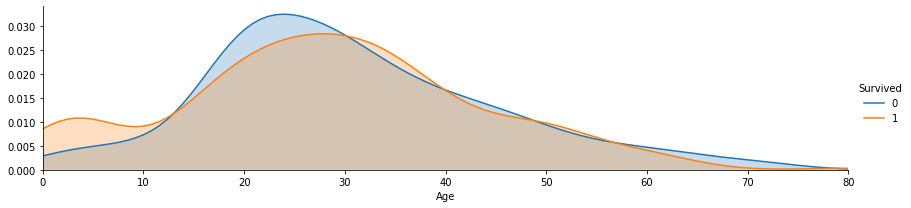

In [23]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
 
plt.show()

### Impute missing Fare values

Fare doesn't have much missing values. 

It has 0 missing values in train data , but 1 missing value in test data.

Lets impute the missing Fare value by imputing it with median of group by Embarked, Pclass and Sex

In [24]:
train_data.Fare.isnull().sum(), test_data.Fare.isnull().sum()

(0, 1)

In [25]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [26]:
test_data.groupby(['Embarked','Pclass','Sex'])['Fare'].median().reset_index()

,Embarked,Pclass,Sex,Fare
0,0,1,0,61.17500
1,0,1,1,42.40000
2,0,2,0,24.50000
3,0,2,1,13.00000
4,0,3,0,12.28750
5,0,3,1,7.98750
6,1,1,0,90.00000
7,1,2,1,11.52915
8,1,3,0,7.75000
9,1,3,1,7.75000


In [27]:
train_data.groupby(['Embarked','Pclass','Sex'])['Fare'].median().reset_index()

,Embarked,Pclass,Sex,Fare
0,0,1,0,79.8250
1,0,1,1,35.0000
2,0,2,0,23.0000
3,0,2,1,13.0000
4,0,3,0,14.4500
5,0,3,1,8.0500
6,1,1,0,90.0000
7,1,1,1,90.0000
8,1,2,0,12.3500
9,1,2,1,12.3500


In [28]:
test_data['Fare'] = test_data.fillna(test_data.groupby(['Embarked','Pclass','Sex'])['Fare'].median())

In [29]:
train_data.Fare.isnull().sum(), test_data.Fare.isnull().sum()

(0, 0)

### Imputing missing Age values

Age has 177 missing values in Train data and 86 missing values in Test data. Its a huge number.

Just replacing them with the median or mean is not a good idea as Age might differ within different groups of passengers.

Let's check the group of our dataset by sex, Title and passenger class and for each subset let's compute the median age.


In [30]:
train_data.Age.isnull().sum(), test_data.Age.isnull().sum()

(177, 86)

In [31]:
test_data['Age'] = test_data['Age'].apply(pd.to_numeric)

In [32]:
test_data_subgrp = test_data.groupby(['Sex','Pclass','Title_Code'])['Age'].median().reset_index()
test_data_subgrp


,Sex,Pclass,Title_Code,Age
0,0,1,1,32.0
1,0,1,2,48.0
2,0,1,4,39.0
3,0,2,1,19.5
4,0,2,2,29.0
5,0,3,1,22.0
6,0,3,2,28.0
7,0,3,4,NaN
8,1,1,0,42.0
9,1,1,3,9.5


In [33]:
train_data_subgrp = train_data.groupby(['Sex','Pclass','Title_Code']).median().reset_index()[['Sex', 'Pclass', 'Title_Code', 'Age']]
train_data_subgrp


,Sex,Pclass,Title_Code,Age
0,0,1,1,30.0
1,0,1,2,41.5
2,0,1,4,28.5
3,0,2,1,24.0
4,0,2,2,32.0
5,0,2,4,28.0
6,0,3,1,18.0
7,0,3,2,31.0
8,1,1,0,40.0
9,1,1,3,4.0


In [34]:
def process_age(row, dataset):
    '''
    This functions helps in imputing the Age by setting up the median Age of the group as per Sex, Pclass and Title_code
    
    Argument :
     row : row of the dataFrame its being mapped with
     dataset : whether the dataset is of Training or of Testing Data
    '''
    if(dataset == 'train'):
        condition = (
            (train_data_subgrp['Sex'] == row['Sex']) & 
            (train_data_subgrp['Title_Code'] == row['Title_Code']) & 
            (train_data_subgrp['Pclass'] == row['Pclass'])
            ) 
        return train_data_subgrp[condition]['Age'].values[0]
    else:
        condition = (
            (test_data_subgrp['Sex'] == row['Sex']) & 
            (test_data_subgrp['Title_Code'] == row['Title_Code']) & 
            (test_data_subgrp['Pclass'] == row['Pclass'])
            ) 
        return train_data_subgrp[condition]['Age'].values[0]


def impute_age(df,dataset):
    '''
    This functions helps in imputing the Age by setting up the missing value by median of the group 
    '''
    df['Age'] = df.apply(lambda row: process_age(row,dataset) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

In [35]:
train_data = impute_age(train_data,'train')
test_data = impute_age(test_data,'test')


In [36]:
train_data.Age.isnull().sum(), test_data.Age.isnull().sum()

(0, 0)

### Prepare the dataset

In [37]:
train_data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Code
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,2


In [38]:
for data in train_test_data:   
    data.loc[data.Sex == 0, 'Sex'] = 'female'
    data.loc[data.Sex == 1, 'Sex'] = 'male'

In [39]:
train_data_dummies = pd.get_dummies(train_data['Sex'], prefix='Sex')
train_data = pd.concat([train_data, train_data_dummies], axis=1)
train_data.drop('Sex', inplace=True, axis=1)

test_data_dummies = pd.get_dummies(test_data['Sex'], prefix='Sex')
test_data = pd.concat([test_data, test_data_dummies], axis=1)
test_data.drop('Sex', inplace=True, axis=1)

In [40]:
train_data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Code,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,2,2,1,0


In [41]:
convert_dict = {'Embarked': str, 
                'Sex_female': int,
                'Sex_male' : int
               } 
  
train_data = train_data.astype(convert_dict) 
test_data = test_data.astype(convert_dict) 

train_data_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
train_data = pd.concat([train_data, train_data_dummies], axis=1)
train_data.drop('Embarked', inplace=True, axis=1)

test_data_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
test_data = pd.concat([test_data, test_data_dummies], axis=1)
test_data.drop('Embarked', inplace=True, axis=1)

In [42]:
train_data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Code,Sex_female,Sex_male,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,2,1,0,0,0,1


In [52]:
features_drop = ['PassengerId', 'Ticket', 'Cabin']
train = train_data.drop(features_drop, axis=1)
test = test_data.drop(features_drop, axis=1)
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [53]:
train_data.shape, target.shape

((891, 11), (891,))

# Model Prep

We will use our knowledge of the passengers based on the EDA and then build a statistical model. We can think of this model as a box that predicts whether or not passenger survives based on the information of any new passenger.

There is a lot of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.

We'll be using Random Forests, along with couple of them.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [48]:
'''

Y = train_data.Survived.values
X = train_data[['Pclass','Sex','SibSp','Fare','Embarked','Parch']].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
'''

"\n\nY = train_data.Survived.values\nX = train_data[['Pclass','Sex','SibSp','Fare','Embarked','Parch']].values\n\nx_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)\n"

### kNN

In [54]:
clf = KNeighborsClassifier(n_neighbors = 12)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.76404494 0.70786517 0.61797753 0.6741573  0.74157303
 0.75280899 0.75280899 0.70786517 0.71910112]


In [55]:
round(np.mean(score)*100, 3)

71.826

### Decision Tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=2)

In [61]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.84269663 0.76404494 0.78651685 0.75280899 0.78651685
 0.78651685 0.82022472 0.82022472 0.74157303]


In [62]:
# decision tree Score
round(np.mean(score)*100, 3)

78.456

### Random Forest

In [63]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.86516854 0.78651685 0.82022472 0.79775281 0.82022472
 0.80898876 0.82022472 0.80898876 0.82022472]


In [64]:
# Random Forest Score
round(np.mean(score)*100, 3)

81.594

### SVM

In [67]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/Users/kumarchk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumarchk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumarchk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumarchk/anaconda3/lib/python3.7/site-p

[0.66666667 0.79775281 0.74157303 0.66292135 0.71910112 0.75280899
 0.69662921 0.74157303 0.70786517 0.71910112]


In [68]:
round(np.mean(score)*100,3)

72.06

# Testing

In [77]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data,target)

predict = clf.predict(test)

In [78]:
prediction = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predict
    })

prediction.to_csv('prediction.csv', index=False)

In [79]:
prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
